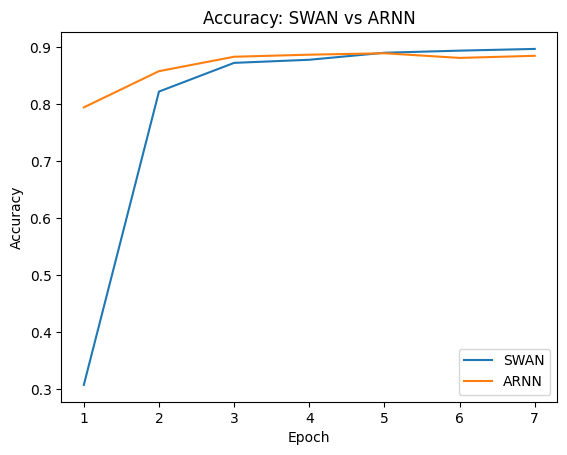

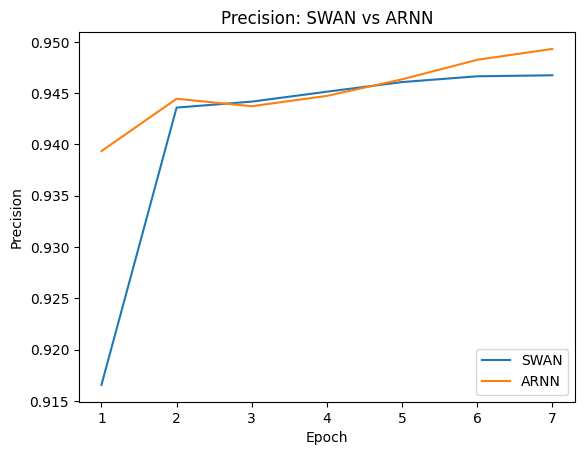

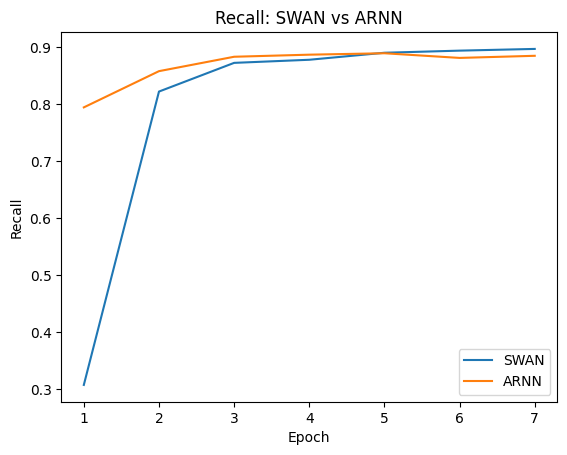

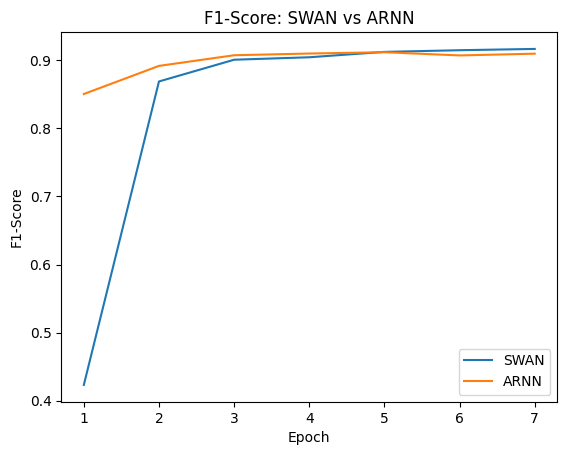

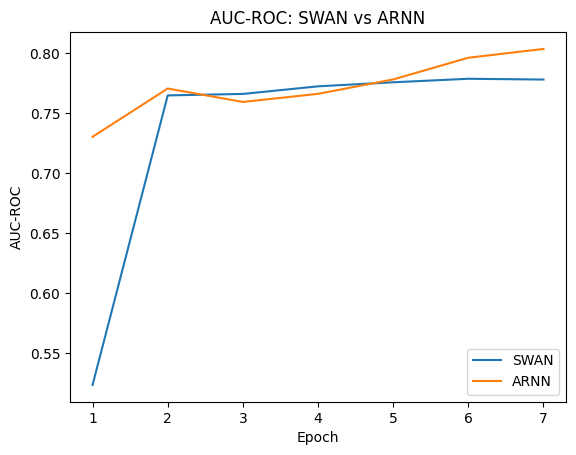

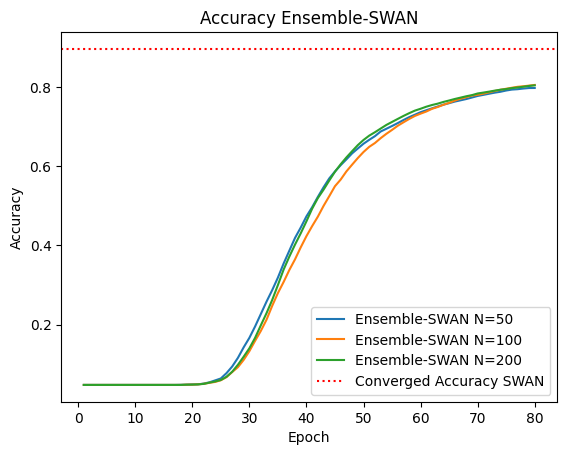

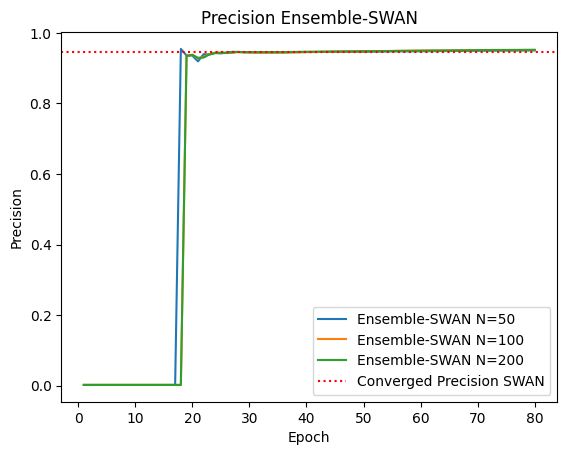

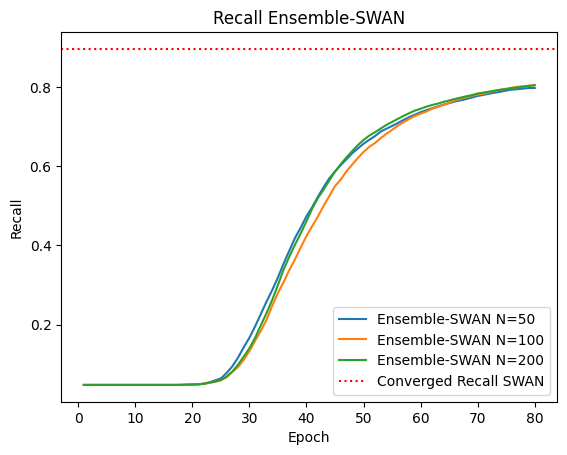

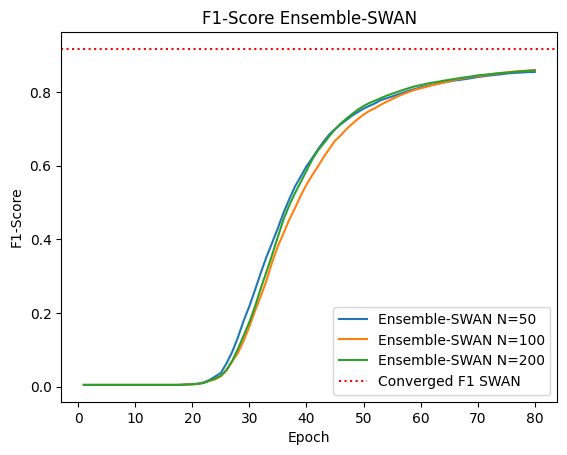

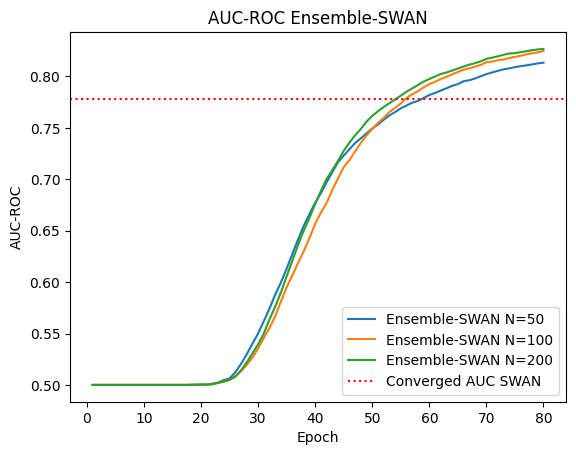

In [2]:
#@title import
import pandas as pd
import numpy as np
import random
# Neural network
import torch
import torch.nn as nn
import torch.optim as optim

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import SGD 
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import math
import sys

from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, precision_recall_curve


seed_value = 2000
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)


#Performance measures SWAN oversampled (high acc)
accuracy_SWAN = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\acc_array.npy")
precision_SWAN = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\precision_array.npy")
recall_SWAN = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\recall_array.npy")
Fmeasure_SWAN = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\Fmeasure_array.npy")
AUC_SWAN = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\AUC_array.npy")
precision_SWAN_unw = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\precision_array_unw.npy")
recall_SWAN_unw = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\recall_array_unw.npy")
AUC_SWAN_unw = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\AUC_array_unw.npy")
Fmeasure_SWAN_unw = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\Fmeasure_array_unw.npy")

accuracy_ARNN = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\ARNN\acc_array_ARNN.npy")
precision_ARNN = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\ARNN\precision_array_ARNN.npy")
recall_ARNN = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\ARNN\recall_array_ARNN.npy")
Fmeasure_ARNN = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\ARNN\Fmeasure_array_ARNN.npy")
AUC_ARNN = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\ARNN\AUC_array_ARNN.npy")
precision_ARNN_unw = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\ARNN\precision_array_unw_ARNN.npy")
recall_ARNN_unw = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\ARNN\recall_array_unw_ARNN.npy")
AUC_ARNN_unw = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\ARNN\AUC_array_unw_ARNN.npy")
Fmeasure_ARNN_unw = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\FINAL performance measures\ARNN\Fmeasure_array_unw_ARNN.npy")


accuracy_SWAN_lower = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\acc_array_85.npy")
precision_SWAN_lower = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\precision_array_85.npy")
recall_SWAN_lower = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\recall_array_85.npy")
Fmeasure_SWAN_lower = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Oversampled model used in thesis\Fmeasure_array_85.npy")


#Accurcay plot
x = np.arange(1, 8)
fig, ax = plt.subplots()
ax.plot(x, accuracy_SWAN, label='SWAN')
ax.plot(x, accuracy_ARNN, label='ARNN')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy: SWAN vs ARNN')
ax.legend(loc='lower right')
plt.show()

#Precision plot
x = np.arange(1, 8)
fig, ax = plt.subplots()
ax.plot(x, precision_SWAN, label='SWAN')
ax.plot(x, precision_ARNN, label='ARNN')
ax.set_xlabel('Epoch')
ax.set_ylabel('Precision')
ax.set_title('Precision: SWAN vs ARNN')
ax.legend(loc='lower right')
plt.show()

#Recall plot
x = np.arange(1, 8)
fig, ax = plt.subplots()
ax.plot(x, recall_SWAN, label='SWAN')
ax.plot(x, recall_ARNN, label='ARNN')
ax.set_xlabel('Epoch')
ax.set_ylabel('Recall')
ax.set_title('Recall: SWAN vs ARNN')
ax.legend(loc='lower right')
plt.show()

#F-Measure plot
x = np.arange(1, 8)
fig, ax = plt.subplots()
ax.plot(x, Fmeasure_SWAN, label='SWAN')
ax.plot(x, Fmeasure_ARNN ,label='ARNN')
ax.set_xlabel('Epoch')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score: SWAN vs ARNN')
ax.legend(loc='lower right')
plt.show()

#AUC plot
x = np.arange(1, 8)
fig, ax = plt.subplots()
ax.plot(x, AUC_SWAN, label='SWAN')
ax.plot(x, AUC_ARNN ,label='ARNN')
ax.set_xlabel('Epoch')
ax.set_ylabel('AUC-ROC')
ax.set_title('AUC-ROC: SWAN vs ARNN')
ax.legend(loc='lower right')
plt.show()


#Ensemble learning
ensemble_accuracy_100 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=100\Per epoch\ensemble_accuracy1.npy")
ensemble_precision_100 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=100\Per epoch\ensemble_precision1.npy")
ensemble_recall_100 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=100\Per epoch\ensemble_recall1.npy")
ensemble_F1_100 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=100\Per epoch\ensemble_f11.npy")
ensemble_AUC_100 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=100\Per epoch\ensemble_AUC1.npy")

ensemble_accuracy_200 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=200\ensemble_accuracy_N=200.npy")
ensemble_precision_200 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=200\ensemble_precision_N=200.npy")
ensemble_recall_200 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=200\ensemble_recall_N=200.npy")
ensemble_F1_200 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=200\ensemble_f1_N=200.npy")
ensemble_AUC_200 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=200\ensemble_AUC_N=200.npy")

ensemble_accuracy_50 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=50\ensemble_accuracy_N=50v2.npy")
ensemble_precision_50 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=50\ensemble_precision_N=50v2.npy")
ensemble_recall_50 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=50\ensemble_recall_N=50v2.npy")
ensemble_F1_50 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=50\ensemble_f1_N=50v2.npy")
ensemble_AUC_50 = np.load(r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\03 model output\Ensemble Learning\N=50\ensemble_AUC_N=50v2.npy")




#Accurcay plot
x = np.arange(1, 81)
fig, ax = plt.subplots()
converged_SWAN_accuracy = accuracy_SWAN[6]
ax.plot(x, ensemble_accuracy_50, label='Ensemble-SWAN N=50')
ax.plot(x, ensemble_accuracy_100, label='Ensemble-SWAN N=100')
ax.plot(x, ensemble_accuracy_200, label='Ensemble-SWAN N=200')
ax.axhline(y=converged_SWAN_accuracy, color='red', linestyle='dotted', label='Converged Accuracy SWAN')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Ensemble-SWAN')
ax.legend(loc='lower right')
plt.show()

#Precision plot
x = np.arange(1, 81)
fig, ax = plt.subplots()
converged_SWAN_precision = precision_SWAN[6]
ax.plot(x, ensemble_precision_50, label='Ensemble-SWAN N=50')
ax.plot(x, ensemble_precision_100, label='Ensemble-SWAN N=100')
ax.plot(x, ensemble_precision_200, label='Ensemble-SWAN N=200')
ax.axhline(y=converged_SWAN_precision, color='red', linestyle='dotted', label='Converged Precision SWAN')
ax.set_xlabel('Epoch')
ax.set_ylabel('Precision')
ax.set_title('Precision Ensemble-SWAN')
ax.legend(loc='lower right')
plt.show()

#Recall plot
x = np.arange(1, 81)
fig, ax = plt.subplots()
converged_SWAN_recall = recall_SWAN[6]
ax.plot(x, ensemble_recall_50, label='Ensemble-SWAN N=50')
ax.plot(x, ensemble_recall_100, label='Ensemble-SWAN N=100')
ax.plot(x, ensemble_recall_200, label='Ensemble-SWAN N=200')
ax.axhline(y=converged_SWAN_recall, color='red', linestyle='dotted', label='Converged Recall SWAN')
ax.set_xlabel('Epoch')
ax.set_ylabel('Recall')
ax.set_title('Recall Ensemble-SWAN')
ax.legend(loc='lower right')
plt.show()

#F-Measure plot
x = np.arange(1, 81)
fig, ax = plt.subplots()
converged_SWAN_F1 = Fmeasure_SWAN[6]
ax.plot(x, ensemble_F1_50, label='Ensemble-SWAN N=50')
ax.plot(x, ensemble_F1_100, label='Ensemble-SWAN N=100')
ax.plot(x, ensemble_F1_200 ,label='Ensemble-SWAN N=200')
ax.axhline(y=converged_SWAN_F1, color='red', linestyle='dotted', label='Converged F1 SWAN')
ax.set_xlabel('Epoch')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score Ensemble-SWAN')
ax.legend(loc='lower right')
plt.show()

#AUC plot
x = np.arange(1, 81)
fig, ax = plt.subplots()
converged_SWAN_AUC = AUC_SWAN[6]
ax.plot(x, ensemble_AUC_50, label='Ensemble-SWAN N=50')
ax.plot(x, ensemble_AUC_100, label='Ensemble-SWAN N=100')
ax.plot(x, ensemble_AUC_200 ,label='Ensemble-SWAN N=200')
ax.axhline(y=converged_SWAN_AUC, color='red', linestyle='dotted', label='Converged AUC SWAN')
ax.set_xlabel('Epoch')
ax.set_ylabel('AUC-ROC')
ax.set_title('AUC-ROC Ensemble-SWAN')
ax.legend(loc='lower right')
plt.show()
